# Rolling Window Normalization

In financial data analysis, normalizing time series data using a rolling window is a common method to make the data more comparable and to remove effects that could distort(歪める) the analysis, such as trends and seasonality. Here's how it generally works and why it's often chosen:

## What is Rolling Window Normalization?
**Rolling Window Normalization** involves calculating statistics like the mean and standard deviation over a specifict window of time (e.g., 30 days), and then using these statistics to normalize the data within this window. The window then 'rolls' forward one time period (e.g., one day) and the process is repeated. This results in each data point being normalized based on the context of the surrounding data points within the window.

## Steps to Normalize Time Series Data Using a Rolling Window:
1. **Choose the Window Size**: Decide on the number of time periods (days, months, etc.) that will define the context for each calculation. Smaller windows might respond  more quickly to changes, while larger windows could smooth out more noise.
2. **Calculate Rolling Statistics**: For each window, calculate the necessary statistics:
    * **Rolling Mean(μ)**: The average of the data within the window.
    * **Rolling Standard Deviation(σ)**: Measures how spread out the numbers are in the window.
3. **Normalize*** For each data point in the window, normalzie using the formula:
$$
\text{Normalized Value} = \frac{{\text{Data Point} - \text{Rolling Mean}}}{{\text{Rolling Standard Deviation}}}
$$

This formula adjusts the data point relative to the average and spread of values in its window.

## Why Use Rolling Window Normalization?
1. **Local context**: It accounts for local variations by normalizing the data with respect to its <u>immediate context</u>, rather than entire dataset.
2. **Trend and Volatility Adjustment**: Financial data can be volatile and exhibit varying trends. Rolling windows can adapt to such changes by recalculating the statistics periodically.
3. **Comparability**: It makes data points comparable across different times by scaling them in relation to their local statistics. This is crucial when different periods have different levels of activity or volatility.
4. **Mitigate Non-Stationarity**: Financial time series are often non-stationary (their mean and variance change over time). Rolling normalization helps in dealing with non-stationarity, which simplifies modeling and forecansting.

## Example Application
* **Risk Managmement**: Adjusting financial returns for volatility to assesse risk more accurately.
* **Algorithmic Trading**: Normalizing price data to identify when a stock is statistically 'cheap' or 'expensive' relative to its recent history.


By using rolling window normalization, analysts and traders can make more informed decisions based on a more consistent and standardized datasets.

# Example code

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creating synthetic time series data
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
data = np.random.randn(len(dates)).cumsum() + 100 # Random walk data

# Convert to DataFrame
df = pd.DataFrame(data, index=dates, columns=['Price'])

# Define window size for rolling statistics
window_size = 10

# Calculate rolling mean and standard deviation
rolling_mean = df['Price'].rolling(window=window_size).mean()
rolling_std = df['Price'].rolling(window=window_size).std()

# Normalize the data
df['Normalized'] = (df['Price'] - rolling_mean) / rolling_std

display(rolling_mean.tail())
display(rolling_std.tail())
display(df.tail())

2023-04-06    101.391764
2023-04-07    101.679904
2023-04-08    102.164623
2023-04-09    102.769108
2023-04-10    103.308348
Freq: D, Name: Price, dtype: float64

2023-04-06    1.315827
2023-04-07    1.474073
2023-04-08    1.834194
2023-04-09    1.866687
2023-04-10    1.944005
Freq: D, Name: Price, dtype: float64

,Price,Normalized
2023-04-06,103.655530,1.720413
2023-04-07,103.666030,1.347373
2023-04-08,105.451900,1.792219
2023-04-09,105.578812,1.505182
2023-04-10,105.980802,1.374716


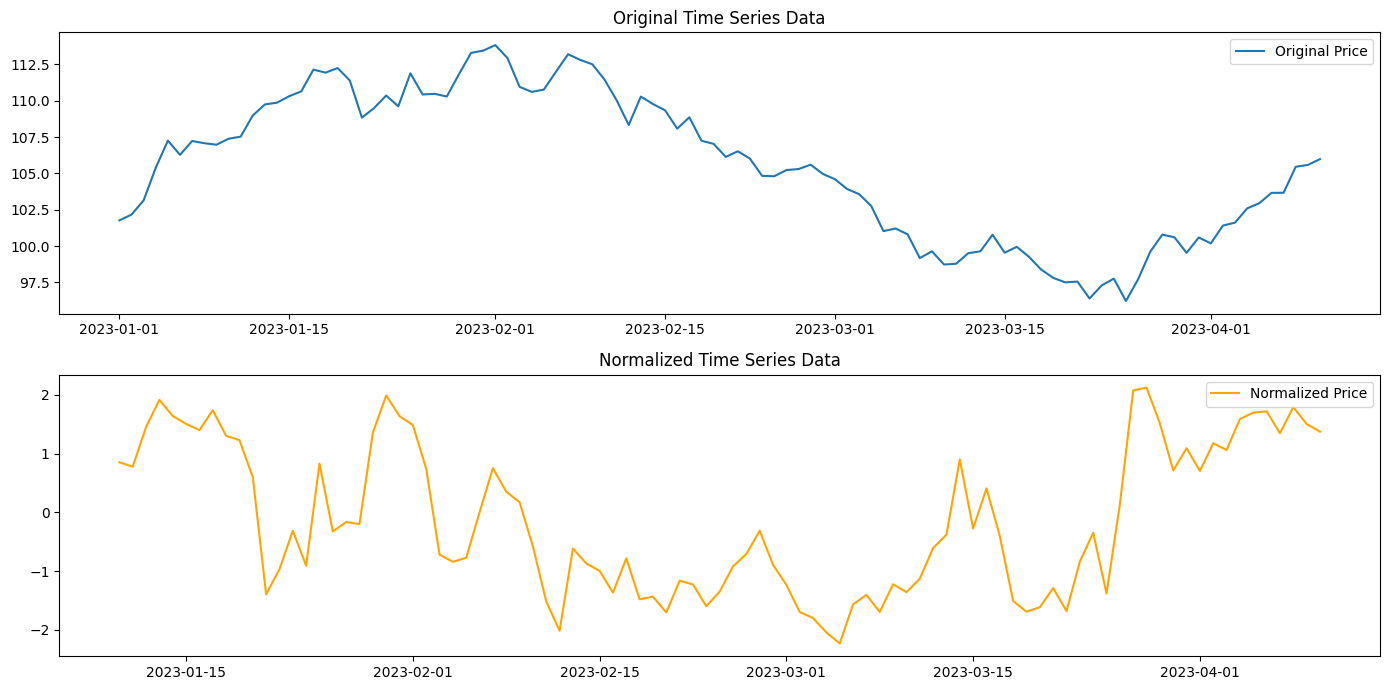

In [5]:
# Plot original and normalized data
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['Price'], label='Original Price')
plt.title('Original Time Series Data')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['Normalized'], label='Normalized Price', color='orange')
plt.title('Normalized Time Series Data')
plt.legend()

plt.tight_layout()
plt.show()

This code generates synthetic data that mimics a financial time series, then applies a rolling window of 10 days to calculate the mean and standard deviation. The data is then normalized by subtracting the mean and dividing by the standard deviation for each rolling window.

In [6]:
df.head(15)

,Price,Normalized
2023-01-01,101.764052,NaN
2023-01-02,102.164210,NaN
2023-01-03,103.142948,NaN
2023-01-04,105.383841,NaN
2023-01-05,107.251399,NaN
2023-01-06,106.274121,NaN
2023-01-07,107.224209,NaN
2023-01-08,107.072852,NaN
2023-01-09,106.969633,NaN
2023-01-10,107.380232,0.853281


As you can see, the first several data points cannot be normalized since there isn't enough data to fill the window. Once the window is full, the mormalization begins. This method allows you to evaluate how the price is behaving relative to its recent history.

# About Data Leakage
In the context of time series data analysis, **data leakage** refers to the unintentional use of information in the model training process that would not be available at the time of prediction in a real-world scenaril. This can lead to overly optimistic performance estimates and models that perform poorly in production.

<br>
With rolling window normalization, the risk of data leakage is generally lower compared to some other methods because the normalization is performed using only historical data available up to the point of each observation. Here's how it manages to monimize data leakage:

1. **Local Calculation**: Each data point is normalized based on statistics (mean, standard deviation) calculated from the past data within the window. This ensures that the normalization process does not incorporate future data, which would be unknown ata the moment of prediction.
2. **Temporal Integrigy(誠実さ)**: By strictly using past and current data within the window to normalize each point, the method respects the temporal order of data. This is crucial in time series analysis where the sequence and timing of data points are significant.

<br>
However, to fully prevent data leakage, it's essential to be mindful of how the rolling window is defined and used, especially when splitting the dataset into training and test sets:

* **Correst Data Split**: Ensure that the rolling window calculations for the testing set begin after the last data point of the training set, using only the data from the training set to initialize any necessary states or parameters. This avoids the situation where the model inadvertently(うっかり) learns information from the testing set.
* **Window Initialization**: For models that require a fully populated window for normalization (i.e., the window size is crucial to the calculation), the biginning of the dataset or the testing set might need special handling. For example, if your window size is 30 days, you need to have at least 30 days of data before you can calculate the first normalized value. Care must be taken not to use future data to fill in or initialize these windows at the start of the dataset or test period.

By carefully manging these aspects,rolling normalization can be used effectively without introducing data leakage, making it a reliable method for preparing time series data for analysis and predictive modeling.

Here are two approaches to split your dataset for training and testing when using rolling window normalization:

### No Data Leakage Version
In this approach, we first split the data into training and testing datasets and then recalculate rolling statistics separately for the test dataset. This ensures that the normalization in the test set only uses data from the test set itself, mimicking a real-world scenario where future data is not known during model training.

**Code Example:**
```python
# Correctly splitting data for training and testing
train_df = df.loc[df.index < '2023-05-01']
test_df = df.loc[df.index >= '2023-05-01']

# Recalculating rolling statistics for the test set (no data from training set is used)
test_df['Normalized'] = (test_df['Price'] - test_df['Price'].rolling(window=20).mean()) / test_df['Price'].rolling(window=20).std()
```

**First few entries of test data (No Leakage):**
```plaintext
2023-05-01    NaN
2023-05-02    NaN
2023-05-03    NaN
2023-05-04    NaN
2023-05-05    NaN
```
Notice that the first entries are `NaN` because there isn’t enough data in the test set initially to fill the rolling window.

### Data Leakage Version
In this flawed approach, rolling statistics are calculated using the entire dataset first, and then the data is split into training and testing sets. This leads to data leakage because the normalization of the test data uses information from the entire time series, including the future data that would not be available at the time of prediction.

**Code Example:**
```python
# Calculating normalization on the entire dataset and then splitting (leads to leakage)
leakage_normalized_df = (df['Price'] - df['Price'].rolling(window=20).mean()) / df['Price'].rolling(window=20).std()
leakage_train_df = leakage_normalized_df.loc[df.index < '2023-05-01']
leakage_test_df = leakage_normalized_df.loc[df.index >= '2023-05-01']
```

**First few entries of test data (With Leakage):**
```plaintext
2023-05-01    1.495723
2023-05-02    1.096700
2023-05-03    1.071849
2023-05-04    1.288325
2023-05-05    1.029345
```
Here, values are immediately available and normalized based on the full dataset's statistics, including data points that follow the test period.

This illustrates the importance of correctly handling data to prevent leakage in time series analysis.

The concept of data leakage in the context of the "Data Leakage Version" isn't immediately obvious because it may appear that each data point is only using past information due to the rolling window. However, the critical point of leakage here comes from the procedure followed when calculating and applying the normalization, particularly how the rolling mean and standard deviation are computed for the entire dataset before splitting into training and testing sets.

Here's why this leads to data leakage:

1. **Pre-Calculated Statistics Across All Data**: When the rolling mean and standard deviation are calculated using the entire dataset (including both what will later be split into training and test sets), these statistics for any given point in the test set are influenced by data points that come after the training set. Even if these statistics are calculated in a rolling manner, they include information from future data points relative to the time of the split.

2. **Normalization Based on Future Information**: By normalizing the test data using statistics that have already 'seen' these test points during their calculation, we inadvertently introduce future knowledge into the test set. For instance, a significant price change after the training set ends could affect the mean and standard deviation calculations that are used to normalize the prices at the end of the training set. This would not be possible in a real-world scenario where future data isn't available.

3. **Impact on Model Training and Evaluation**: If a model is trained on this normalized data and then tested, it may perform unexpectedly well because it had access to future trends and volatility through the statistics used for normalization. This does not accurately represent the model’s performance when deployed in real-world conditions, where only past data is available at the time of prediction.

The essence of avoiding data leakage lies in ensuring that any calculation for normalization (or feature engineering in general) in the test set does not have any information from the test set itself or beyond the training period. This is why recalculating the rolling statistics solely from the test data as it becomes available, without prior knowledge, is critical to maintain the integrity and predictive reliability of a time series model.